In [2]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('/data/ds-riskeye/sourcedata/behavior.tsv', sep='\t', index_col=[0,1,2,3,4, 5])

In [6]:
df['risky_left'] = df['p_right'] == 1.0

In [7]:
reset1 = df.reset == 1
df['n_left'] = df['n_risky'].where(reset1, df['n_safe'])
df['n_right'] = df['n_risky'].where(~reset1, df['n_safe'])
df['p_left'] = df['p_right'] = 0.55
df['p_left'] = df['p_left'].where(reset1, 1.0)
df['p_right'] = df['p_right'].where(~reset1, 1.0)

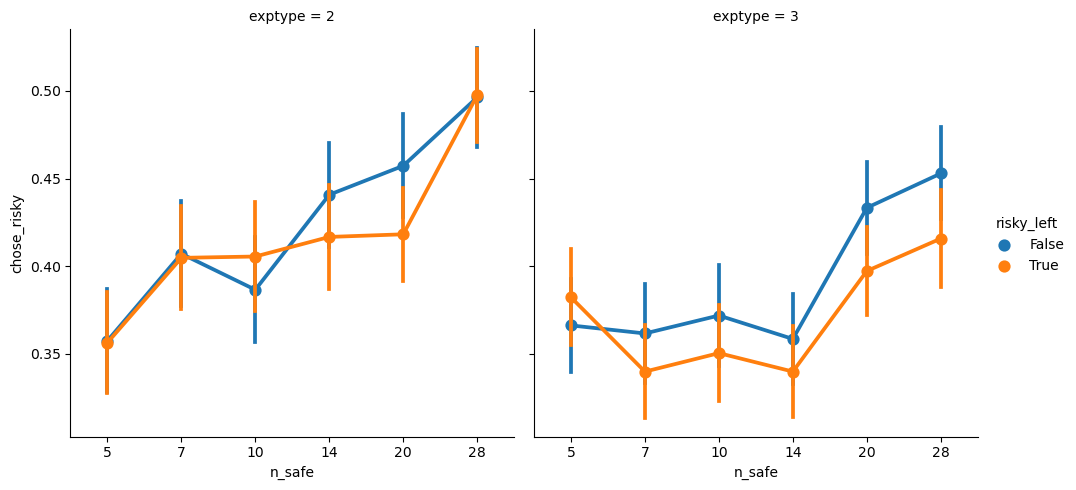

In [8]:
tmp = df.groupby(['subject', 'n_safe', 'risky_left', 'exptype']).mean()
sns.catplot(data=tmp.reset_index(), x='n_safe', y='chose_risky', hue='risky_left', col='exptype', kind='point', errorbar='se')

In [9]:
import pingouin

In [10]:
pingouin.rm_anova(tmp.xs(2, 0, 'exptype').reset_index(), dv='chose_risky', within=['n_safe', 'risky_left'], subject='subject')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,n_safe,1.418147,5,315,0.283629,9.602107,1.523584e-08,0.000010,0.033436,0.570998
1,risky_left,0.011510,1,63,0.011510,0.826250,3.668234e-01,0.366823,0.000281,1.000000
2,n_safe * risky_left,0.067803,5,315,0.013561,1.001248,4.170465e-01,0.413831,0.001651,0.925263


In [11]:
pingouin.rm_anova(tmp.xs(3, 0, 'exptype').reset_index(), dv='chose_risky', within=['n_safe', 'risky_left'], subject='subject')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,n_safe,0.852924,5,310,0.170585,6.933753,0.000004,0.000397,0.025666,0.525523
1,risky_left,0.091530,1,62,0.091530,3.327994,0.072929,0.072929,0.002819,1.000000
2,n_safe * risky_left,0.049043,5,310,0.009809,0.746412,0.589251,0.578595,0.001512,0.919129


In [13]:
import numpy as np
df['log(risky/safe)'] = np.log(df['n_risky']/df['n_safe'])

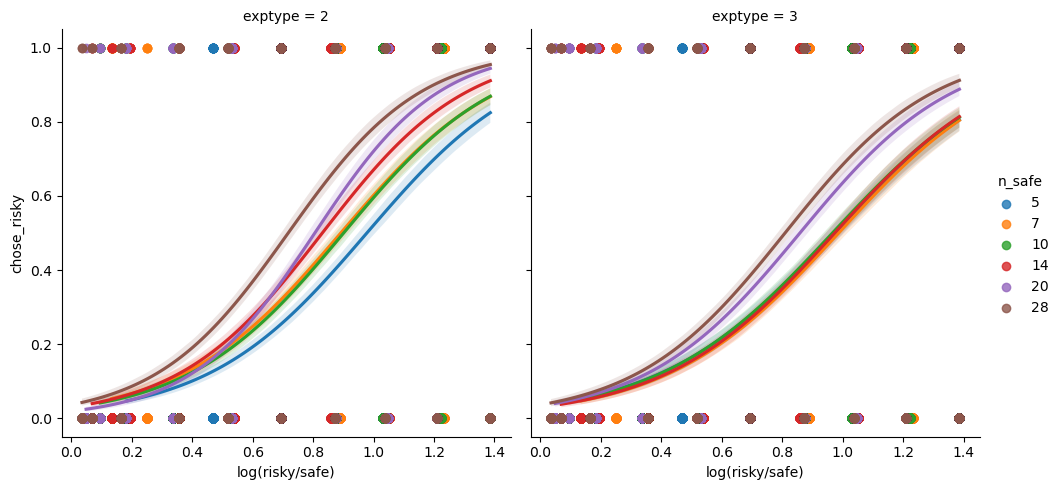

IOStream.flush timed out


In [14]:
sns.lmplot(data=df.reset_index(), x='log(risky/safe)', y='chose_risky', logistic=True, hue='n_safe', col='exptype')

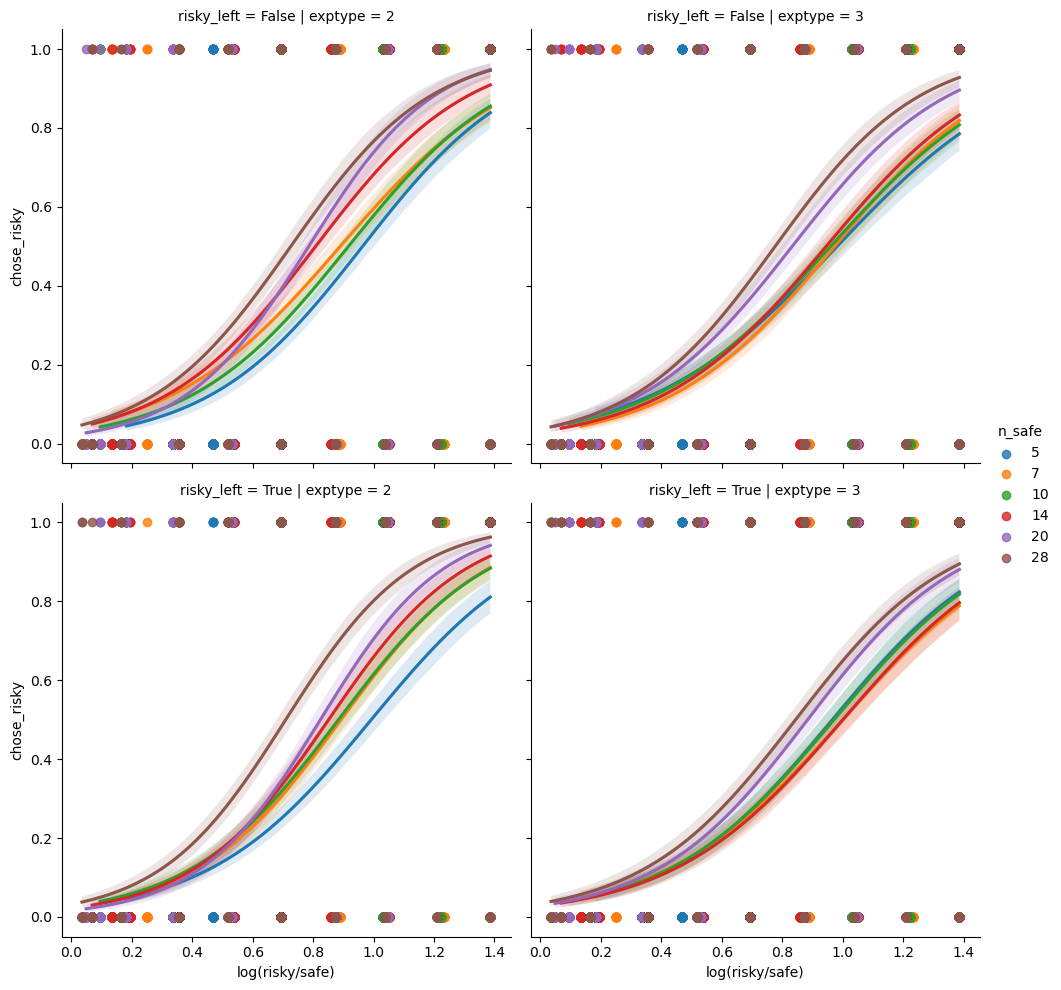

In [15]:
sns.lmplot(data=df.reset_index(), x='log(risky/safe)', y='chose_risky', logistic=True, hue='n_safe', col='exptype', row='risky_left')

In [16]:
import bambi

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [17]:
df

accuracy    rt  leftRight  \
subject subject.1 run exptype block trial_nr                              
1       1         1   2       1     1                1  1215          1   
                                    2                1   737         -1   
                                    3                1   920         -1   
                                    4                1   965         -1   
                                    5                1  1218          1   
...                                                ...   ...        ...   
64      64        5   3       2     236              1   674          1   
                                    237              0   915          1   
                                    238              1   669          1   
                                    239              1   822         -1   
                                    240              1  1015          1   

                                              pressedKey  n_safe  n_risky  \
subject subject.1 run exptype block trial_nr                                
1       1         1   2       1     1                 75      14       47   
                                    2                 77       5        6   
                                    3                 77      14       17   
                                    4                 77      10       12   
                                    5                 75      14       28   
...                                                  ...     ...      ...   
64      64        5   3       2     236               75      14       15   
                                    237               75       5       12   
                                    238               75      10       12   
                                    239               77       5       20   
                                    240               75      20       22   

                                              constSide  correct_perm  reset  \
subject subject.1 run exptype block trial_nr                                   
1       1         1   2       1     1                 0            -1     -1   
                                    2                 0             1     -1   
                                    3                 0             1     -1   
                                    4                 0             1     -1   
                                    5                 0            -1     -1   
...                                                 ...           ...    ...   
64      64        5   3       2     236               0             1      1   
                                    237               0            -1      1   
                                    238               0             1      1   
                                    239               0            -1      1   
                                    240               0             1      1   

                                              n_left  n_right  p_left  \
subject subject.1 run exptype block trial_nr                            
1       1         1   2       1     1             14       47    1.00   
                                    2              5        6    1.00   
                                    3             14       17    1.00   
                                    4             10       12    1.00   
                                    5             14       28    1.00   
...                                              ...      ...     ...   
64      64        5   3       2     236           15       14    0.55   
                                    237           12        5    0.55   
                                    238           12       10    0.55   
                                    239           20        5    0.55   
                                    240           22       20    0.55   

                                              p_right  chose_risky  \
subject